In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import skew, kurtosis
import statistics

In [2]:
# Leer archivo CSV
df_csv = pd.read_csv('parkinsons_disease_data.csv', sep=',')
df_csv

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,...,8.076254,1,0,0,0,1,1,0,0,DrXXXConfid
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,...,1.665751,0,0,0,1,0,1,1,1,DrXXXConfid
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,...,4.785614,0,0,0,0,1,1,0,1,DrXXXConfid
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,...,8.378979,1,0,1,0,0,1,1,1,DrXXXConfid


### **<span>Punto 1</span>**

In [ ]:
def medidas_tendencia_central(datos):    
    # Medidas de tendencia central

    print("📊 Medidas de tendencia central:")
    # Media
    media = np.mean(datos)
    print("-Media:", media)

    # Mediana
    mediana = np.median(datos)
    print("-Mediana:", mediana)

    # Moda
    modas = statistics.multimode(datos)
    print(f"-Las modas son: {modas}")

def medidas_posicion(datos):
    # Cálculo de cuartiles
    Q1 = np.percentile(datos, 25)  # Primer cuartil (P25)
    Q2 = np.percentile(datos, 50)  # Mediana (P50)
    Q3 = np.percentile(datos, 75)  # Tercer cuartil (P75)

    # Mostrar resultados
    print("📊 Medidas de Posición:")
    print("Cuartiles:")
    print(f"Q1 (P25): {Q1}")
    print("Interpretación: El 25% de los valores son menores o iguales a", Q1)
    print(f"\nMediana (Q2/P50): {Q2}")
    print("Interpretación: El 50% de los valores son menores o iguales a", Q2)
    print(f"\nQ3 (P75): {Q3}")
    print("Interpretación: El 75% de los valores son menores o iguales a", Q3)

def calcular_medidas_variabilidad(datos):
   
    # Convertimos los datos a una Serie de Pandas para poder usar métodos como .quantile()
    # Una Serie es como una columna de Excel: una estructura que contiene datos y nos permite aplicar operaciones estadísticas fácilmente.
    datos = pd.Series(datos)

    # Rango: diferencia entre el valor máximo y mínimo
    rango = datos.max() - datos.min()

    # Varianza: mide cuánto se dispersan los datos respecto a la media
    varianza = datos.var()

    # Desviación estándar: raíz cuadrada de la varianza (también mide dispersión, pero en las mismas unidades que los datos)
    desviacion_std = datos.std()

    # Rango intercuartílico (IQR): mide la dispersión del 50% central de los datos (entre Q3 y Q1)
    rango_intercuartilico = datos.quantile(0.75) - datos.quantile(0.25)

    # Coeficiente de variación (CV): relación entre la desviación estándar y la media (expresado como %)
    coef_var = (desviacion_std / datos.mean()) * 100

    # Imprimimos los resultados
    print("📊 Medidas de Variabilidad:")
    print(f"- Rango (máx - mín): {rango:.2f}")
    print(f"- Varianza: {varianza:.2f}")
    print(f"- Desviación estándar: {desviacion_std:.2f}")
    print(f"- Rango intercuartílico (IQR): {rango_intercuartilico:.2f}")
    print(f"- Coeficiente de variación (CV): {coef_var:.2f}%")

def medidas_simetria_curtosis(datos):
    """
    Calcula e imprime las medidas de simetría (asimetría) y curtosis de un conjunto de datos.
    
    Parámetros:
    - datos: array o lista de valores numéricos.
    
    Explicación:
    - Asimetría (skewness): mide qué tan simétrica es la distribución respecto a la media.
        * Valor ≈ 0: simétrica.
        * Valor > 0: asimetría positiva (cola hacia la derecha).
        * Valor < 0: asimetría negativa (cola hacia la izquierda).
        
    - Curtosis: mide la "altura" de la distribución en comparación con una distribución normal.
        * Valor ≈ 3: distribución normal (mesocúrtica).
        * Valor > 3: más concentrada (leptocúrtica).
        * Valor < 3: más plana (platicúrtica).
    """
    # Asegurar que los datos estén en formato de Serie de pandas
    datos = pd.Series(datos)
    
    # Calcular medidas
    asimetria = skew(datos)
    curt = kurtosis(datos, fisher=False)  # Fisher=False para comparar con valor 3 de la normal

    # Mostrar resultados con interpretación
    print("📊 Medidas de Simetría y Curtosis:")
    print(f"- Asimetría (skewness): {asimetria:.2f}")
    if asimetria > 0:
        print("  → Distribución asimétrica positiva (cola hacia la derecha)")
    elif asimetria < 0:
        print("  → Distribución asimétrica negativa (cola hacia la izquierda)")
    else:
        print("  → Distribución simétrica")

    print(f"- Curtosis: {curt:.2f}")
    if curt > 3:
        print("  → Distribución leptocúrtica (más aguda o con colas más pesadas)")
    elif curt < 3:
        print("  → Distribución platicúrtica (más plana o con colas más ligeras)")
    else:
        print("  → Distribución mesocúrtica (similar a una distribución normal)")

def frecuencias_cuantitativas(data, variable):
    """
    Calcula la tabla de distribución de frecuencias para una variable cuantitativa.

    Parámetros:
    - data: DataFrame de pandas que contiene los datos.
    - variable: Nombre de la columna (str) que representa la variable cuantitativa.

    Retorna:
    - DataFrame con las columnas 'Clase', 'Marca de clase', 'Frecuencia Absoluta', 
    'Frecuencia absoluta Acumulada', 'Frecuencia relativa', 'Frecuencia relativa Acumulada', 
    'Frecuencia Porcentual'.
    """

    # Determinar el rango o recorrido (R)
    rango = data[variable].max() - data[variable].min()
    print(f"Rango o recorrido (R): {rango}")

    # Número de clases (k)
    # Número de clases (k) usando la regla de Sturges
    n = len(data[variable])
    k = np.ceil(1 + 3.32 * np.log10(n))
    print(f"Número de clases (k): {k}")

    # Amplitud del intervalo (A)
    A = np.ceil(rango / k)
    print(f"Amplitud del intervalo (A): {A}")

    # Construcción de los intervalos de clase
    # Usa la función np.arange para generar valores desde el mínimo de los datos hasta el máximo, 
    # con un paso igual a la amplitud del intervalo (A).
    intervalos = np.arange(data[variable].min(), data[variable].max() + A, A)
    print(f"Intervalos: {intervalos}")
    intervalos_cerrados = [(intervalos[i], intervalos[i+1] - 1) for i in range(len(intervalos) - 1)]
    print(f"Intervalos Cerrados: {intervalos_cerrados}")

    # Calcular la frecuencia absoluta
    frecuencias, bins = np.histogram(data[variable], bins=intervalos)

    # Calcular la marca de clase (punto medio de cada intervalo)
    marcas_clase = [(intervalo[0] + intervalo[1]) / 2 for intervalo in intervalos_cerrados]

    # Frecuencia absoluta acumulada
    fa_acumulada = np.cumsum(frecuencias)

    # Frecuencia relativa
    fr = frecuencias / n

    # Frecuencia relativa acumulada
    fr_acumulada = np.cumsum(fr)

    # Frecuencia porcentual
    fp = fr * 100

    # Crear DataFrame con la tabla de frecuencias
    tabla_frecuencias = pd.DataFrame({
        'Clase': [f"[{int(intervalo[0])}, {int(intervalo[1])}]" for intervalo in intervalos_cerrados],
        'Marca de clase': marcas_clase,
        'Frecuencia Absoluta': frecuencias,
        'Frecuencia absoluta Acumulada': fa_acumulada,
        'Frecuencia relativa': fr,
        'Frecuencia relativa Acumulada': fr_acumulada,
        'Frecuencia Porcentual': fp
    })

    return tabla_frecuencias

def graficar_boxplot_e_histograma(df, columna, color="#A7C7E7"):
    """
    Grafica un boxplot y un histograma para una variable numérica.
    También muestra la frecuencia de cada intervalo del histograma.

    Parámetros:
    - df: DataFrame con los datos
    - columna: Nombre de la columna numérica a graficar
    - color: Color de los gráficos
    """

    print(f"\n📊 Análisis de la variable: {columna}")

    # Calcular número de bins usando la regla de Freedman-Diaconis
    datos = df[columna].dropna()
    q1 = np.percentile(datos, 25)
    q3 = np.percentile(datos, 75)
    iqr = q3 - q1
    bin_width = 2 * iqr / (len(datos) ** (1/3))
    num_bins = int(np.ceil((datos.max() - datos.min()) / bin_width)) if bin_width > 0 else 10

    print(f"👉 Número de intervalos (bins): {num_bins}")

    # Calcular frecuencias e intervalos
    frecuencias, bordes = np.histogram(datos, bins=num_bins)

    print("\n📌 Frecuencia en cada intervalo:")
    for i in range(len(frecuencias)):
        izquierda = round(bordes[i], 2)
        derecha = round(bordes[i+1], 2)
        print(f"Intervalo {i+1}: [{izquierda}, {derecha}) → {frecuencias[i]} datos")

    # Crear los gráficos
    fig, ejes = plt.subplots(nrows=2, sharex=True, figsize=(12, 6),
                             gridspec_kw={"height_ratios": [0.3, 1]})

    # Boxplot
    sns.boxplot(x=datos, ax=ejes[0], color=color, width=0.5,
                flierprops={'marker': 'o', 'color': 'black'})
    ejes[0].set_title("Boxplot (diagrama de caja)")
    ejes[0].set(yticks=[])

    # Histograma
    sns.histplot(datos, bins=num_bins, color=color, alpha=0.7, ax=ejes[1], kde=False)
    ejes[1].set_title("Histograma (frecuencia de los valores)")
    ejes[1].set_xlabel(columna)
    ejes[1].set_ylabel("Frecuencia")

    sns.despine(left=True)
    plt.tight_layout()
    plt.show()

def graficar_densidad(df, columna, color="#A7C7E7"):
    """
    Grafica la distribución de densidad (KDE) para una variable numérica.

    Parámetros:
    - df: DataFrame con los datos.
    - columna: Nombre de la columna numérica a graficar.
    - color: Color de la curva de densidad.
    """
    datos = df[columna].dropna()

    print(f"\n📈 Curva de densidad para: {columna}")
    print("Esta gráfica muestra cómo se distribuyen los valores de la variable.")

    # Graficar KDE
    plt.figure(figsize=(10, 5))
    sns.kdeplot(datos, color=color, fill=True, linewidth=2, alpha=0.5)

    # Etiquetas
    plt.title(f"Densidad de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Densidad estimada")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



### **<span>Variable: Edad</span>**

In [15]:
age = df_csv['Age']
print(f"📊 Maximo: {age.max()}")
print(f"📊 Minimo: {age.min()}")
print('\n')
medidas_tendencia_central(age)
print('\n')
medidas_posicion(age)
print('\n')
calcular_medidas_variabilidad(age)
print('\n')
medidas_simetria_curtosis(age)


📊 Maximo: 89
📊 Minimo: 50


📊 Medidas de tendencia central:
-Media: 69.60190023752969
-Mediana: 70.0
-Las modas son: [84]


📊 Medidas de Posición:
Cuartiles:
Q1 (P25): 60.0
Interpretación: El 25% de los valores son menores o iguales a 60.0

Mediana (Q2/P50): 70.0
Interpretación: El 50% de los valores son menores o iguales a 70.0

Q3 (P75): 80.0
Interpretación: El 75% de los valores son menores o iguales a 80.0


📊 Medidas de Variabilidad:
- Rango (máx - mín): 39.00
- Varianza: 134.43
- Desviación estándar: 11.59
- Rango intercuartílico (IQR): 20.00
- Coeficiente de variación (CV): 16.66%


📊 Medidas de Simetría y Curtosis:
- Asimetría (skewness): -0.03
  → Distribución asimétrica negativa (cola hacia la izquierda)
- Curtosis: 1.82
  → Distribución platicúrtica (Menos concentración en el centro y colas más ligeras)


In [16]:
frecuencias_cuantitativas(df_csv, 'Age')

Rango o recorrido (R): 39
Número de clases (k): 13.0
Amplitud del intervalo (A): 3.0
Intervalos: [50. 53. 56. 59. 62. 65. 68. 71. 74. 77. 80. 83. 86. 89.]
Intervalos Cerrados: [(50.0, 52.0), (53.0, 55.0), (56.0, 58.0), (59.0, 61.0), (62.0, 64.0), (65.0, 67.0), (68.0, 70.0), (71.0, 73.0), (74.0, 76.0), (77.0, 79.0), (80.0, 82.0), (83.0, 85.0), (86.0, 88.0)]


,Clase,Marca de clase,Frecuencia Absoluta,Frecuencia absoluta Acumulada,Frecuencia relativa,Frecuencia relativa Acumulada,Frecuencia Porcentual
0,"[50, 52]",51.0,168,168,0.079810,0.079810,7.980998
1,"[53, 55]",54.0,159,327,0.075534,0.155344,7.553444
2,"[56, 58]",57.0,152,479,0.072209,0.227553,7.220903
3,"[59, 61]",60.0,133,612,0.063183,0.290736,6.318290
4,"[62, 64]",63.0,148,760,0.070309,0.361045,7.030879
5,"[65, 67]",66.0,169,929,0.080285,0.441330,8.028504
6,"[68, 70]",69.0,154,1083,0.073159,0.514489,7.315914
7,"[71, 73]",72.0,177,1260,0.084086,0.598575,8.408551
8,"[74, 76]",75.0,168,1428,0.079810,0.678385,7.980998
9,"[77, 79]",78.0,149,1577,0.070784,0.749169,7.078385



📊 Análisis de la variable: Age
👉 Número de intervalos (bins): 13

📌 Frecuencia en cada intervalo:
Intervalo 1: [50.0, 53.0) → 168 datos
Intervalo 2: [53.0, 56.0) → 159 datos
Intervalo 3: [56.0, 59.0) → 152 datos
Intervalo 4: [59.0, 62.0) → 133 datos
Intervalo 5: [62.0, 65.0) → 148 datos
Intervalo 6: [65.0, 68.0) → 169 datos
Intervalo 7: [68.0, 71.0) → 154 datos
Intervalo 8: [71.0, 74.0) → 177 datos
Intervalo 9: [74.0, 77.0) → 168 datos
Intervalo 10: [77.0, 80.0) → 149 datos
Intervalo 11: [80.0, 83.0) → 148 datos
Intervalo 12: [83.0, 86.0) → 164 datos
Intervalo 13: [86.0, 89.0) → 216 datos


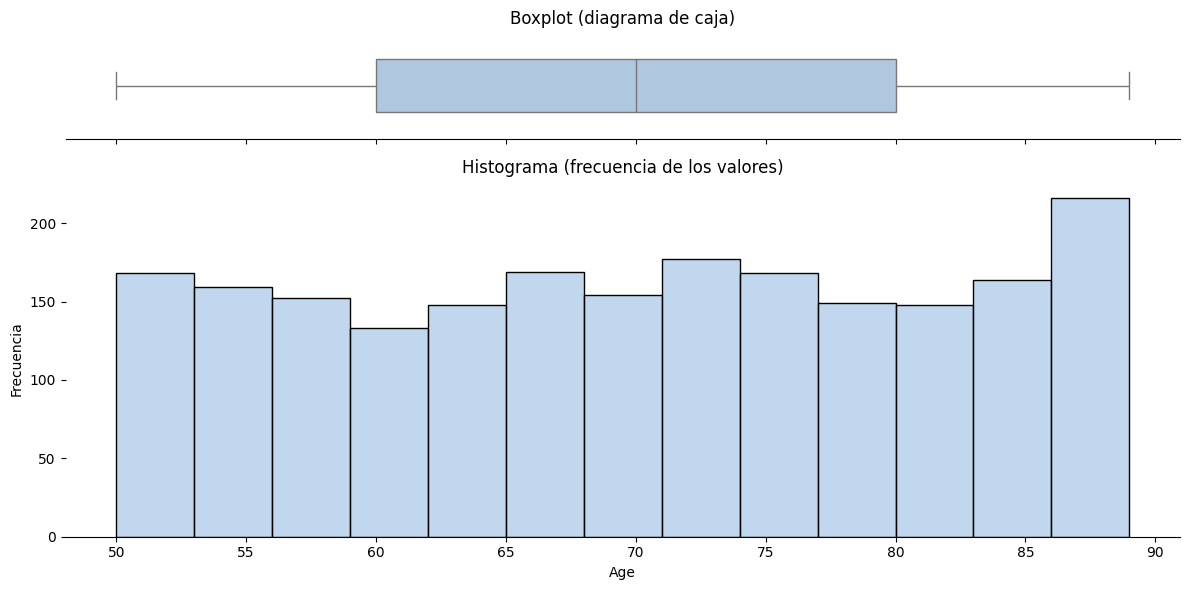


📈 Curva de densidad para: Age
Esta gráfica muestra cómo se distribuyen los valores de la variable.


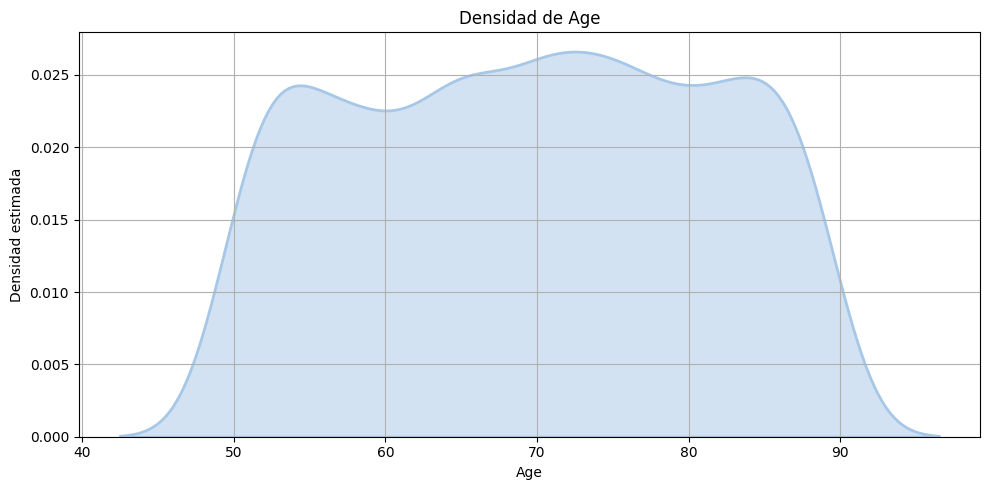

In [ ]:
graficar_boxplot_e_histograma(df_csv, 'Age')
graficar_densidad(df_csv, 'Age')

Identificar si existen valores atípicos en las variable Edad, ¿estos valores podrían generar un falso análisis?

### **<span>Variable: BMI (Índice de masa corporal)</span>**

In [18]:
bmi = df_csv['BMI']
print(f"📊 Maximo: {bmi.max()}")
print(f"📊 Minimo: {bmi.min()}")
print('\n')
medidas_tendencia_central(bmi)
print('\n')
medidas_posicion(bmi)
print('\n')
calcular_medidas_variabilidad(bmi)
print('\n')
medidas_simetria_curtosis(bmi)

📊 Maximo: 39.99988683753807
📊 Minimo: 15.008333144286365


📊 Medidas de tendencia central:
-Media: 27.209492765200114
-Mediana: 27.18457079160664
-Las modas son: [19.619877964608285, 16.24733915647557, 15.368238711416376, 15.45455732879956, 18.61604176916242, 39.423311410061466, 30.54200328786717, 36.758281614016326, 22.38058650336209, 23.72708627731125, 38.482544735296, 35.8967386979048, 30.22551207817625, 38.29830655044067, 34.96532287396592, 18.958781252278897, 28.049580065989524, 21.856123048651224, 19.00200404613128, 22.548338606571637, 29.72724175750939, 33.24761782912628, 20.617201897192928, 38.13363959106394, 32.53263836382909, 15.863602948273025, 36.90543424388144, 23.689973180071345, 25.89636741551464, 36.76372472288237, 16.11707674031355, 34.34650293436586, 17.50800314865742, 21.516109097943023, 26.91652697310508, 23.609739445432457, 22.46580131902098, 16.822486777200304, 38.97616761347774, 18.723087295427625, 29.853708036332225, 29.64345724771096, 31.9360490141421, 19.89364

In [19]:
frecuencias_cuantitativas(df_csv, 'BMI')

Rango o recorrido (R): 24.991553693251706
Número de clases (k): 13.0
Amplitud del intervalo (A): 2.0
Intervalos: [15.00833314 17.00833314 19.00833314 21.00833314 23.00833314 25.00833314
 27.00833314 29.00833314 31.00833314 33.00833314 35.00833314 37.00833314
 39.00833314 41.00833314]
Intervalos Cerrados: [(15.008333144286365, 16.008333144286365), (17.008333144286365, 18.008333144286365), (19.008333144286365, 20.008333144286365), (21.008333144286365, 22.008333144286365), (23.008333144286365, 24.008333144286365), (25.008333144286365, 26.008333144286365), (27.008333144286365, 28.008333144286365), (29.008333144286365, 30.008333144286365), (31.008333144286365, 32.00833314428637), (33.00833314428637, 34.00833314428637), (35.00833314428637, 36.00833314428637), (37.00833314428637, 38.00833314428637), (39.00833314428637, 40.00833314428637)]


,Clase,Marca de clase,Frecuencia Absoluta,Frecuencia absoluta Acumulada,Frecuencia relativa,Frecuencia relativa Acumulada,Frecuencia Porcentual
0,"[15, 16]",15.508333,176,176,0.083610,0.083610,8.361045
1,"[17, 18]",17.508333,174,350,0.082660,0.166271,8.266033
2,"[19, 20]",19.508333,196,546,0.093112,0.259382,9.311164
3,"[21, 22]",21.508333,178,724,0.084561,0.343943,8.456057
4,"[23, 24]",23.508333,156,880,0.074109,0.418052,7.410926
5,"[25, 26]",25.508333,159,1039,0.075534,0.493587,7.553444
6,"[27, 28]",27.508333,162,1201,0.076960,0.570546,7.695962
7,"[29, 30]",29.508333,171,1372,0.081235,0.651781,8.123515
8,"[31, 32]",31.508333,169,1541,0.080285,0.732067,8.028504
9,"[33, 34]",33.508333,174,1715,0.082660,0.814727,8.266033



📊 Análisis de la variable: BMI
👉 Número de intervalos (bins): 13

📌 Frecuencia en cada intervalo:
Intervalo 1: [15.01, 16.93) → 172 datos
Intervalo 2: [16.93, 18.85) → 161 datos
Intervalo 3: [18.85, 20.78) → 191 datos
Intervalo 4: [20.78, 22.7) → 162 datos
Intervalo 5: [22.7, 24.62) → 168 datos
Intervalo 6: [24.62, 26.54) → 150 datos
Intervalo 7: [26.54, 28.47) → 156 datos
Intervalo 8: [28.47, 30.39) → 156 datos
Intervalo 9: [30.39, 32.31) → 163 datos
Intervalo 10: [32.31, 34.23) → 163 datos
Intervalo 11: [34.23, 36.16) → 175 datos
Intervalo 12: [36.16, 38.08) → 141 datos
Intervalo 13: [38.08, 40.0) → 147 datos


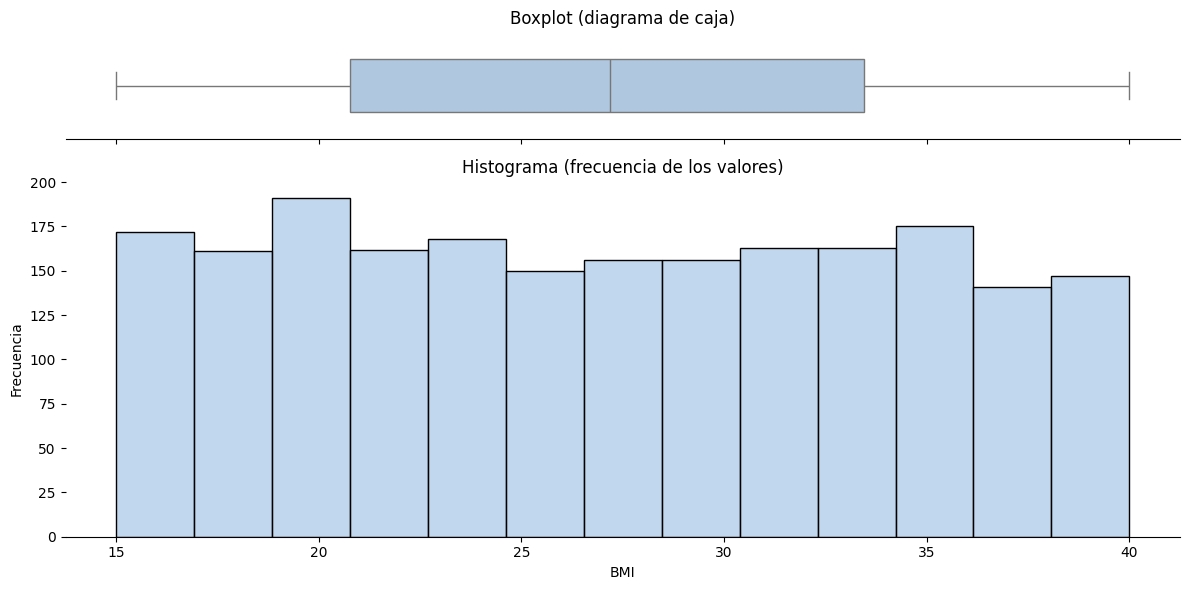


📈 Curva de densidad para: BMI
Esta gráfica muestra cómo se distribuyen los valores de la variable.


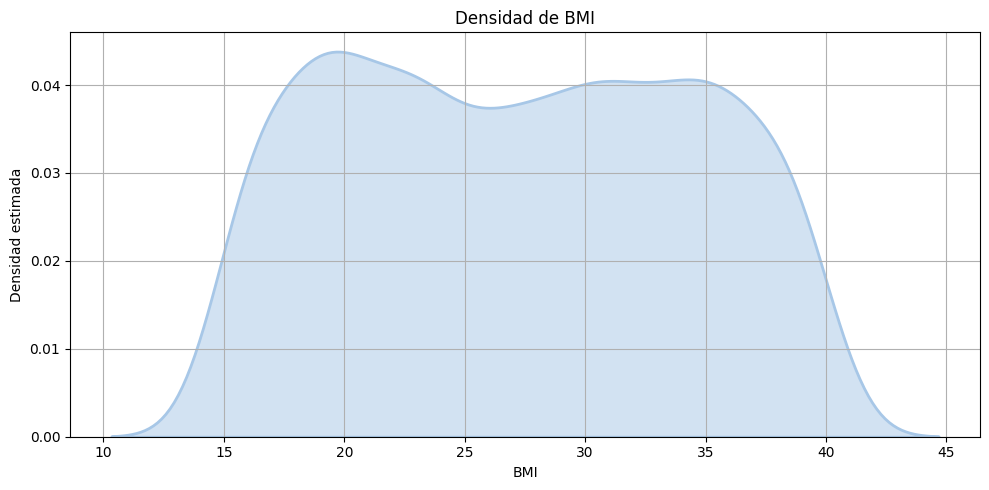

In [20]:
graficar_boxplot_e_histograma(df_csv, 'BMI')
graficar_densidad(df_csv, 'BMI')

Identificar si existen valores atípicos en las variable BMI, ¿estos valores podrían generar un falso análisis?

### **<span>Variable: Colesterol total</span>**

In [21]:
colesterol = df_csv['CholesterolTotal']
print(f"📊 Maximo: {colesterol.max()}")
print(f"📊 Minimo: {colesterol.min()}")
print('\n')
medidas_tendencia_central(colesterol)
print('\n')
medidas_posicion(colesterol)
print('\n')
calcular_medidas_variabilidad(colesterol)
print('\n')
medidas_simetria_curtosis(colesterol)

📊 Maximo: 299.9630739305192
📊 Minimo: 150.06269820288267


📊 Medidas de tendencia central:
-Media: 226.86083976879297
-Mediana: 228.52825624521068
-Las modas son: [222.8422778232232, 210.50113288438223, 287.3879956557186, 280.3395460135172, 284.0141507422267, 290.1331221023323, 283.5030140912468, 185.20370314606868, 274.97014867403914, 204.47184188266183, 195.12056120926803, 282.5629376741359, 231.16325953053823, 189.24322583044284, 278.15384070149526, 243.2914023487305, 180.99282347960468, 179.81651118279487, 161.09049069341933, 216.69918393708215, 154.96005678886863, 153.6414785670579, 174.59474277265224, 241.2617843515152, 239.2256789413424, 246.54971082444644, 249.71351946498635, 216.92813424868712, 249.38228987301693, 151.75453572734006, 251.1870707743057, 249.0416857407817, 263.53317944463447, 268.58074026192315, 158.24923160091154, 278.43673070713635, 160.2626031996525, 164.7391378954802, 187.69615596235596, 214.4728872697078, 241.09625775689787, 200.9213620653495, 253.212614952

In [22]:
frecuencias_cuantitativas(df_csv, 'CholesterolTotal')

Rango o recorrido (R): 149.90037572763654
Número de clases (k): 13.0
Amplitud del intervalo (A): 12.0
Intervalos: [150.0626982 162.0626982 174.0626982 186.0626982 198.0626982 210.0626982
 222.0626982 234.0626982 246.0626982 258.0626982 270.0626982 282.0626982
 294.0626982 306.0626982]
Intervalos Cerrados: [(150.06269820288267, 161.06269820288267), (162.06269820288267, 173.06269820288267), (174.06269820288267, 185.06269820288267), (186.06269820288267, 197.06269820288267), (198.06269820288267, 209.06269820288267), (210.06269820288267, 221.06269820288267), (222.06269820288267, 233.06269820288267), (234.06269820288267, 245.06269820288267), (246.06269820288267, 257.06269820288264), (258.06269820288264, 269.06269820288264), (270.06269820288264, 281.06269820288264), (282.06269820288264, 293.06269820288264), (294.06269820288264, 305.06269820288264)]


,Clase,Marca de clase,Frecuencia Absoluta,Frecuencia absoluta Acumulada,Frecuencia relativa,Frecuencia relativa Acumulada,Frecuencia Porcentual
0,"[150, 161]",155.562698,160,160,0.076010,0.076010,7.600950
1,"[162, 173]",167.562698,149,309,0.070784,0.146793,7.078385
2,"[174, 185]",179.562698,172,481,0.081710,0.228504,8.171021
3,"[186, 197]",191.562698,153,634,0.072684,0.301188,7.268409
4,"[198, 209]",203.562698,176,810,0.083610,0.384798,8.361045
5,"[210, 221]",215.562698,162,972,0.076960,0.461758,7.695962
6,"[222, 233]",227.562698,170,1142,0.080760,0.542518,8.076010
7,"[234, 245]",239.562698,170,1312,0.080760,0.623278,8.076010
8,"[246, 257]",251.562698,162,1474,0.076960,0.700238,7.695962
9,"[258, 269]",263.562698,176,1650,0.083610,0.783848,8.361045



📊 Análisis de la variable: CholesterolTotal
👉 Número de intervalos (bins): 13

📌 Frecuencia en cada intervalo:
Intervalo 1: [150.06, 161.59) → 157 datos
Intervalo 2: [161.59, 173.12) → 144 datos
Intervalo 3: [173.12, 184.66) → 167 datos
Intervalo 4: [184.66, 196.19) → 151 datos
Intervalo 5: [196.19, 207.72) → 162 datos
Intervalo 6: [207.72, 219.25) → 161 datos
Intervalo 7: [219.25, 230.78) → 149 datos
Intervalo 8: [230.78, 242.31) → 172 datos
Intervalo 9: [242.31, 253.84) → 157 datos
Intervalo 10: [253.84, 265.37) → 168 datos
Intervalo 11: [265.37, 276.9) → 163 datos
Intervalo 12: [276.9, 288.43) → 175 datos
Intervalo 13: [288.43, 299.96) → 179 datos


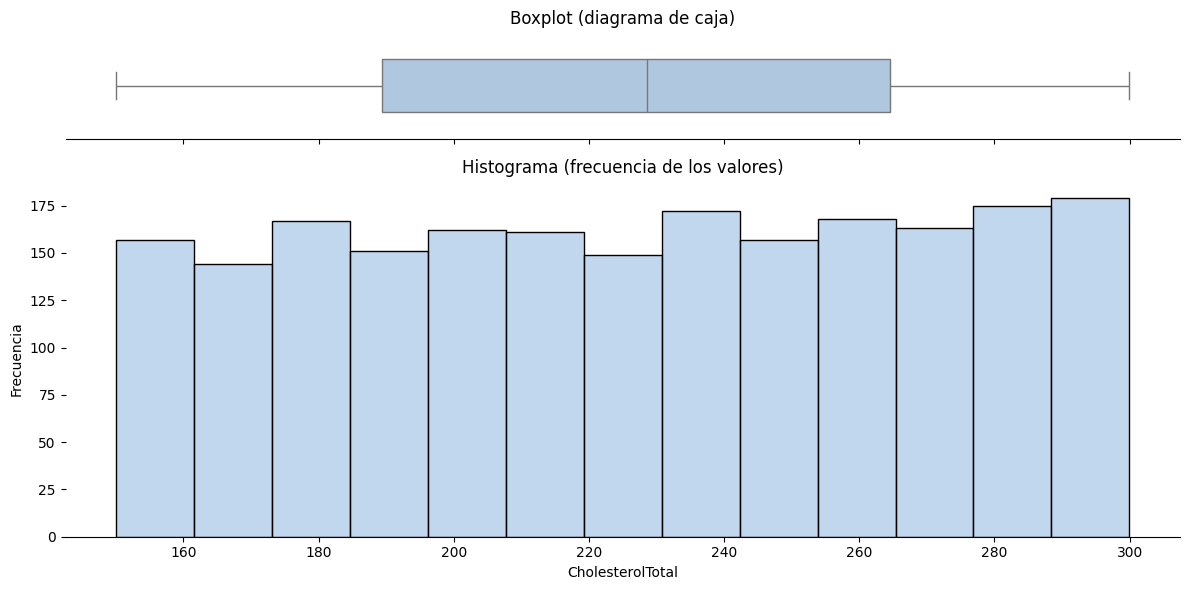


📈 Curva de densidad para: CholesterolTotal
Esta gráfica muestra cómo se distribuyen los valores de la variable.


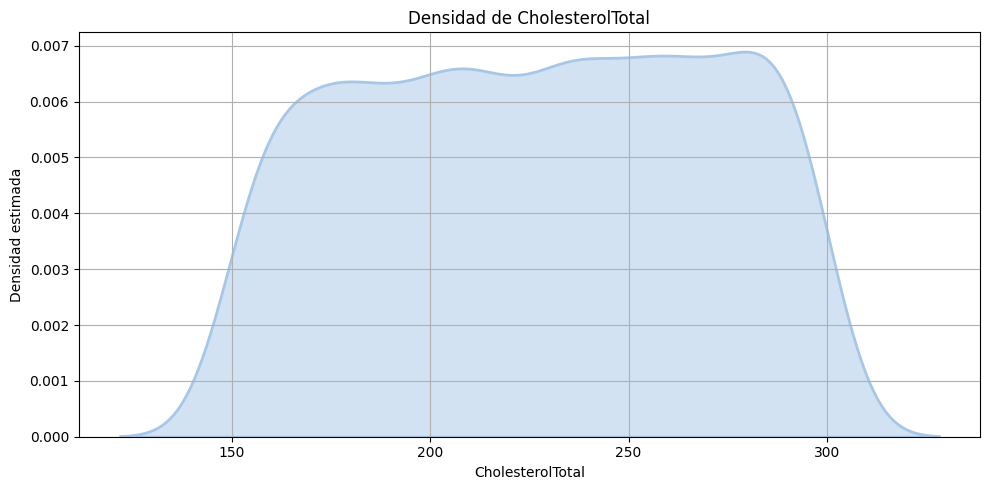

In [23]:
graficar_boxplot_e_histograma(df_csv, 'CholesterolTotal')
graficar_densidad(df_csv, 'CholesterolTotal')

Identificar si existen valores atípicos en las variable Colesterol Total, ¿estos valores podrían generar un falso análisis?

### **<span>Variable: Triglicéridos</span>**

In [24]:
trigliceridos = df_csv['CholesterolTriglycerides']
print(f"📊 Maximo: {trigliceridos.max()}")
print(f"📊 Minimo: {trigliceridos.min()}")
print('\n')
medidas_tendencia_central(trigliceridos)
print('\n')
medidas_posicion(trigliceridos)
print('\n')
calcular_medidas_variabilidad(trigliceridos)
print('\n')
medidas_simetria_curtosis(trigliceridos)

📊 Maximo: 399.9750224753191
📊 Minimo: 50.11360418775354


📊 Medidas de tendencia central:
-Media: 222.9404998224325
-Mediana: 222.80245198268625
-Las modas son: [337.3071139948232, 264.63552148532744, 395.6626489615112, 362.189688382462, 149.95658606233192, 253.7973339365577, 319.85481544744806, 390.3443987692356, 214.60459051964023, 208.05195449418832, 388.8496409551816, 211.46855584040853, 110.14433841517524, 239.2732757786737, 200.05642563886656, 304.4557584088065, 190.54626109586232, 352.35893173645053, 312.49655245910327, 279.6186821126466, 320.774918150783, 179.04849017679257, 384.26573845440186, 385.1932515562724, 352.5856660839363, 399.9365986453812, 299.3743443280048, 319.28810866147205, 397.45255239047367, 95.16151366222618, 394.1659471041083, 338.41853336916074, 258.69187686327723, 162.0150894708407, 225.22677950782784, 216.08168704195907, 170.22695658425857, 185.4576159277748, 62.24847869430171, 200.93710091166855, 275.89501369354286, 395.810315946801, 102.1958230509568, 17

In [25]:
frecuencias_cuantitativas(df_csv, 'CholesterolTriglycerides')

Rango o recorrido (R): 349.8614182875656
Número de clases (k): 13.0
Amplitud del intervalo (A): 27.0
Intervalos: [ 50.11360419  77.11360419 104.11360419 131.11360419 158.11360419
 185.11360419 212.11360419 239.11360419 266.11360419 293.11360419
 320.11360419 347.11360419 374.11360419 401.11360419]
Intervalos Cerrados: [(50.11360418775354, 76.11360418775354), (77.11360418775354, 103.11360418775354), (104.11360418775354, 130.11360418775354), (131.11360418775354, 157.11360418775354), (158.11360418775354, 184.11360418775354), (185.11360418775354, 211.11360418775354), (212.11360418775354, 238.11360418775354), (239.11360418775354, 265.11360418775354), (266.11360418775354, 292.11360418775354), (293.11360418775354, 319.11360418775354), (320.11360418775354, 346.11360418775354), (347.11360418775354, 373.11360418775354), (374.11360418775354, 400.11360418775354)]


,Clase,Marca de clase,Frecuencia Absoluta,Frecuencia absoluta Acumulada,Frecuencia relativa,Frecuencia relativa Acumulada,Frecuencia Porcentual
0,"[50, 76]",63.113604,177,177,0.084086,0.084086,8.408551
1,"[77, 103]",90.113604,173,350,0.082185,0.166271,8.218527
2,"[104, 130]",117.113604,169,519,0.080285,0.246556,8.028504
3,"[131, 157]",144.113604,153,672,0.072684,0.319240,7.268409
4,"[158, 184]",171.113604,153,825,0.072684,0.391924,7.268409
5,"[185, 211]",198.113604,153,978,0.072684,0.464608,7.268409
6,"[212, 238]",225.113604,170,1148,0.080760,0.545368,8.076010
7,"[239, 265]",252.113604,171,1319,0.081235,0.626603,8.123515
8,"[266, 292]",279.113604,157,1476,0.074584,0.701188,7.458432
9,"[293, 319]",306.113604,158,1634,0.075059,0.776247,7.505938



📊 Análisis de la variable: CholesterolTriglycerides
👉 Número de intervalos (bins): 13

📌 Frecuencia en cada intervalo:
Intervalo 1: [50.11, 77.03) → 177 datos
Intervalo 2: [77.03, 103.94) → 172 datos
Intervalo 3: [103.94, 130.85) → 168 datos
Intervalo 4: [130.85, 157.76) → 153 datos
Intervalo 5: [157.76, 184.68) → 151 datos
Intervalo 6: [184.68, 211.59) → 155 datos
Intervalo 7: [211.59, 238.5) → 170 datos
Intervalo 8: [238.5, 265.41) → 170 datos
Intervalo 9: [265.41, 292.33) → 155 datos
Intervalo 10: [292.33, 319.24) → 154 datos
Intervalo 11: [319.24, 346.15) → 166 datos
Intervalo 12: [346.15, 373.06) → 149 datos
Intervalo 13: [373.06, 399.98) → 165 datos


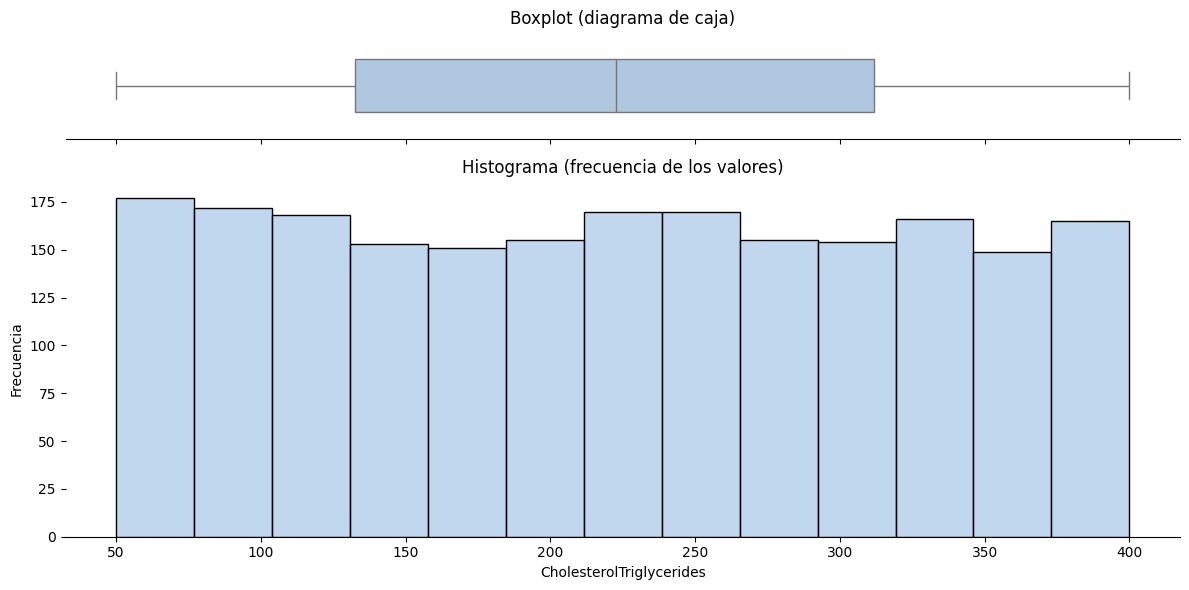


📈 Curva de densidad para: CholesterolTriglycerides
Esta gráfica muestra cómo se distribuyen los valores de la variable.


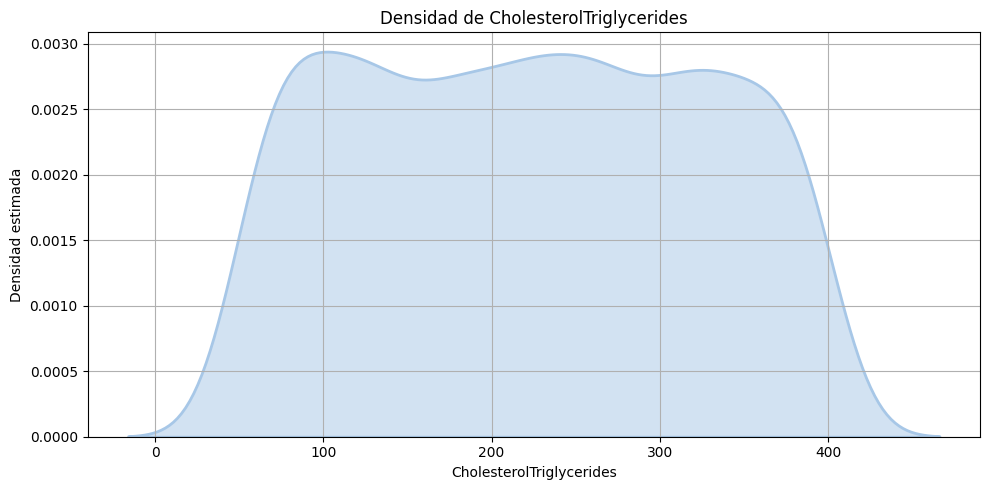

In [26]:
graficar_boxplot_e_histograma(df_csv, 'CholesterolTriglycerides')
graficar_densidad(df_csv, 'CholesterolTriglycerides')

Identificar si existen valores atípicos en las variable Trigliceridos, ¿estos valores podrían generar un falso análisis?

### **<span>Variable: UPDRS (Puntuación de la Escala Unificada de Evaluación de la Enfermedad de Parkinson)</span>**

In [27]:
puntacion = df_csv['UPDRS']
print(f"📊 Maximo: {puntacion.max()}")
print(f"📊 Minimo: {puntacion.min()}")
print('\n')
medidas_tendencia_central(puntacion)
print('\n')
medidas_posicion(puntacion)
print('\n')
calcular_medidas_variabilidad(puntacion)
print('\n')
medidas_simetria_curtosis(puntacion)

📊 Maximo: 198.9536041801936
📊 Minimo: 0.0284410965338546


📊 Medidas de tendencia central:
-Media: 101.41531827710152
-Mediana: 102.56102328715424
-Las modas son: [6.458712950742582, 37.306702734053545, 67.83817038400828, 52.96469599618885, 21.80487994840652, 101.91253614400428, 37.45372031884688, 181.17256510567967, 178.26152136421837, 115.96586931521588, 95.33227724939748, 172.01190934387796, 91.0745414771992, 142.12134114953614, 166.08838526836269, 165.70939811652045, 171.39699664308, 165.80339455370014, 82.68315260815908, 114.96126445141428, 160.54819774437485, 168.55663529590106, 47.35378355385343, 107.3490583988548, 28.900746235751924, 92.27006059115443, 144.27969069343723, 27.690286714959772, 103.01714296933316, 80.81913117194222, 24.873194718307296, 89.69901898248467, 121.75720122368516, 77.09131687455893, 114.8425506971858, 171.2428310189457, 62.53958450198451, 134.48493012397412, 116.0957577121816, 17.994027789051906, 107.0116660611058, 56.78407607643131, 53.9956531596839, 60

In [28]:
frecuencias_cuantitativas(df_csv, 'UPDRS')

Rango o recorrido (R): 198.92516308365973
Número de clases (k): 13.0
Amplitud del intervalo (A): 16.0
Intervalos: [2.84410965e-02 1.60284411e+01 3.20284411e+01 4.80284411e+01
 6.40284411e+01 8.00284411e+01 9.60284411e+01 1.12028441e+02
 1.28028441e+02 1.44028441e+02 1.60028441e+02 1.76028441e+02
 1.92028441e+02 2.08028441e+02]
Intervalos Cerrados: [(0.0284410965338546, 15.028441096533854), (16.028441096533854, 31.028441096533854), (32.028441096533854, 47.028441096533854), (48.028441096533854, 63.028441096533854), (64.02844109653385, 79.02844109653385), (80.02844109653385, 95.02844109653385), (96.02844109653385, 111.02844109653385), (112.02844109653385, 127.02844109653387), (128.02844109653387, 143.02844109653387), (144.02844109653387, 159.02844109653387), (160.02844109653387, 175.02844109653387), (176.02844109653387, 191.02844109653387), (192.02844109653387, 207.02844109653387)]


,Clase,Marca de clase,Frecuencia Absoluta,Frecuencia absoluta Acumulada,Frecuencia relativa,Frecuencia relativa Acumulada,Frecuencia Porcentual
0,"[0, 15]",7.528441,160,160,0.076010,0.076010,7.600950
1,"[16, 31]",23.528441,141,301,0.066983,0.142993,6.698337
2,"[32, 47]",39.528441,178,479,0.084561,0.227553,8.456057
3,"[48, 63]",55.528441,163,642,0.077435,0.304988,7.743468
4,"[64, 79]",71.528441,161,803,0.076485,0.381473,7.648456
5,"[80, 95]",87.528441,180,983,0.085511,0.466983,8.551069
6,"[96, 111]",103.528441,165,1148,0.078385,0.545368,7.838480
7,"[112, 127]",119.528441,192,1340,0.091211,0.636580,9.121140
8,"[128, 143]",135.528441,180,1520,0.085511,0.722090,8.551069
9,"[144, 159]",151.528441,166,1686,0.078860,0.800950,7.885986



📊 Análisis de la variable: UPDRS
👉 Número de intervalos (bins): 14

📌 Frecuencia en cada intervalo:
Intervalo 1: [0.03, 14.24) → 141 datos
Intervalo 2: [14.24, 28.45) → 122 datos
Intervalo 3: [28.45, 42.66) → 155 datos
Intervalo 4: [42.66, 56.86) → 155 datos
Intervalo 5: [56.86, 71.07) → 143 datos
Intervalo 6: [71.07, 85.28) → 129 datos
Intervalo 7: [85.28, 99.49) → 171 datos
Intervalo 8: [99.49, 113.7) → 154 datos
Intervalo 9: [113.7, 127.91) → 169 datos
Intervalo 10: [127.91, 142.12) → 164 datos
Intervalo 11: [142.12, 156.33) → 135 datos
Intervalo 12: [156.33, 170.54) → 170 datos
Intervalo 13: [170.54, 184.74) → 148 datos
Intervalo 14: [184.74, 198.95) → 149 datos


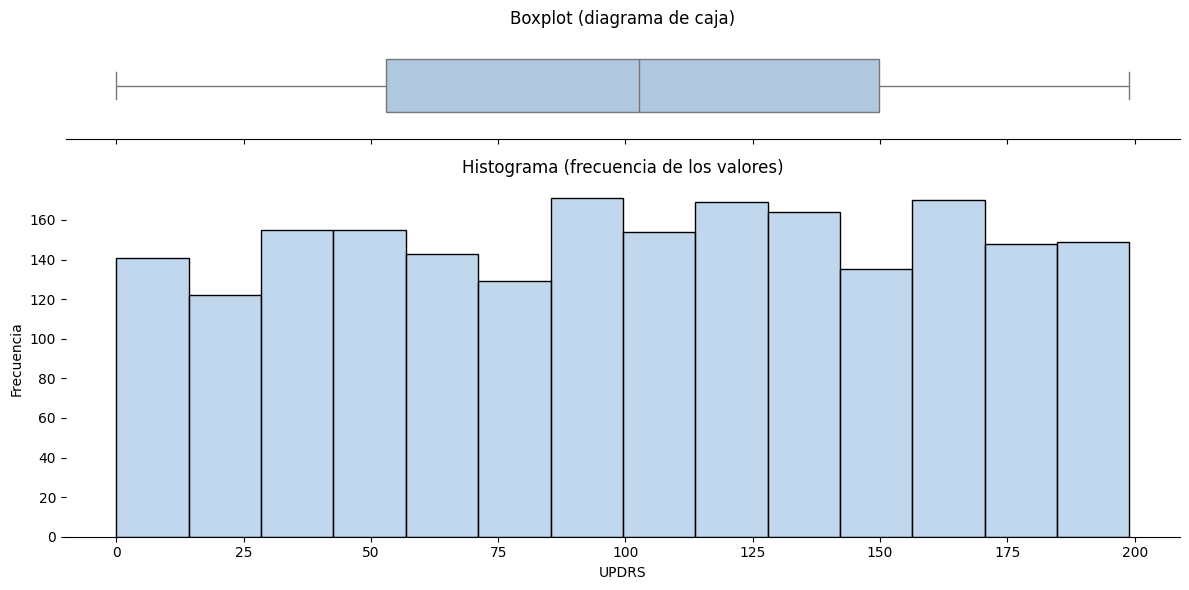


📈 Curva de densidad para: UPDRS
Esta gráfica muestra cómo se distribuyen los valores de la variable.


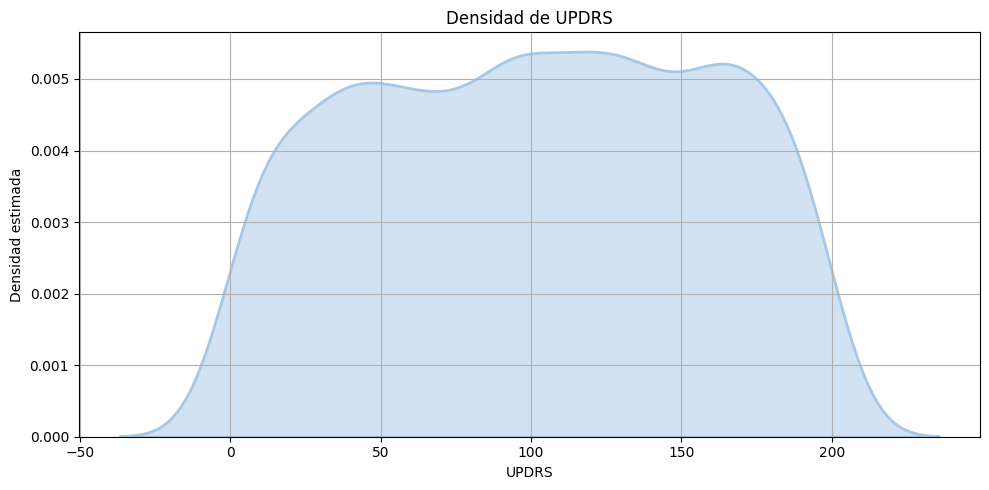

In [29]:
graficar_boxplot_e_histograma(df_csv, 'UPDRS')
graficar_densidad(df_csv, 'UPDRS')

Identificar si existen valores atípicos en las variable UPDRS, ¿estos valores podrían generar un falso análisis?

### **<span>Punto 2</span>**

In [31]:
def frecuencias_cualitativas(data, variable):
    """
    Calcula la tabla de distribución de frecuencias para una variable cualitativa.

    Parámetros:
    - data: DataFrame de pandas que contiene los datos.
    - variable: Nombre de la columna (str) que representa la variable cualitativa.

    Retorna:
    - DataFrame con las columnas 'Clase', 'Frecuencia' y 'Porcentaje'.
    """

    # 1. Contar la cantidad de veces que aparece cada categoría en la variable
    frecuencias = data[variable].value_counts()
    print(frecuencias)

    # 2. Calcular el porcentaje de cada categoría dividiendo por el total y multiplicando por 100
    # normalize=False (por defecto): Devuelve las frecuencias absolutas (conteo total).
    # normalize=True: Devuelve la frecuencia relativa como proporción (entre 0 y 1).
    porcentajes = data[variable].value_counts(normalize=True) * 100

    # 3. Obtener los nombres de las clases (categorías de la variable)
    clases = frecuencias.index.astype(str)  # Convertir a string para asegurar consistencia en los nombres

    # 4. Crear un DataFrame con la información organizada
    tabla = pd.DataFrame({
        'Clase': clases,          # Nombre de la categoría
        'Frecuencia': frecuencias, # Número de veces que aparece la categoría
        'Porcentaje': porcentajes  # Representación en porcentaje
    }).reset_index(drop=True)  # Resetear el índice para una mejor presentación

    # 5. Retornar la tabla con las frecuencias y porcentajes
    return tabla

def graficar_distribucion_categorica(df, columna):
    """
    Grafica un gráfico de torta y un gráfico de barras para una variable categórica.

    Parámetros:
    - df: DataFrame con los datos
    - columna: Nombre de la columna categórica a graficar
    """

    print(f"\n\033[1m{columna.upper()}\033[0m")
    
    # Conteo de frecuencias
    conteo = df[columna].value_counts().sort_values(ascending=False)

    # Paleta de colores (morado pastel)
    colores = ["#D4A5F0", "#C3A2FF", "#B5A8F2", "#A89DE6", "#9D92D9", "#9287CC", "#877CC0"]

    # --- Gráfico de torta ---
    fig_torta = go.Figure(go.Pie(
        labels=conteo.index,
        values=conteo.values,
        marker=dict(colors=colores[:len(conteo)]),
        hole=0.3,
        textinfo="label+percent"
    ))
    fig_torta.update_layout( title="Distribución porcentual de la variable",template="plotly_white", width=700, height=600)
    fig_torta.show()

    # --- Gráfico de barras ---
    fig_barras = go.Figure(go.Bar(
        x=conteo.index,
        y=conteo.values,
        text=conteo.values,
        textposition="outside",
        marker=dict(color=colores[:len(conteo)])
    ))
    fig_barras.update_layout(title="Frecuencia absoluta de la variable", template="plotly_white", width=700, height=600, showlegend=False)
    fig_barras.show()

### **<span>Variable: Diagnosis</span>**

In [33]:
frecuencias_cualitativas(df_csv, 'Diagnosis')

Diagnosis
1    1304
0     801
Name: count, dtype: int64


,Clase,Frecuencia,Porcentaje
0,1,1304,61.947743
1,0,801,38.052257


In [34]:
graficar_distribucion_categorica(df_csv, 'Diagnosis')


DIAGNOSIS


### **<span>Variable: Etnia</span>**

In [35]:
frecuencias_cualitativas(df_csv, 'Ethnicity')

Ethnicity
0    1270
1     425
3     213
2     197
Name: count, dtype: int64


,Clase,Frecuencia,Porcentaje
0,0,1270,60.332542
1,1,425,20.190024
2,3,213,10.118765
3,2,197,9.358670


In [36]:
graficar_distribucion_categorica(df_csv, 'Ethnicity')


ETHNICITY


### **<span>Variable: Nivel Educativo</span>**

In [37]:
frecuencias_cualitativas(df_csv, 'EducationLevel')

EducationLevel
1    840
2    656
0    388
3    221
Name: count, dtype: int64


,Clase,Frecuencia,Porcentaje
0,1,840,39.904988
1,2,656,31.163895
2,0,388,18.432304
3,3,221,10.498812


In [38]:
graficar_distribucion_categorica(df_csv, 'EducationLevel')


EDUCATIONLEVEL


### **<span>Variable: Depresion</span>**

In [39]:
frecuencias_cualitativas(df_csv, 'Depression')

Depression
0    1673
1     432
Name: count, dtype: int64


,Clase,Frecuencia,Porcentaje
0,0,1673,79.477435
1,1,432,20.522565


In [40]:
graficar_distribucion_categorica(df_csv, 'Depression')


DEPRESSION


### **<span>Variable: Problemas del Habla</span>**

In [41]:
frecuencias_cualitativas(df_csv, 'SpeechProblems')

SpeechProblems
0    1484
1     621
Name: count, dtype: int64


,Clase,Frecuencia,Porcentaje
0,0,1484,70.498812
1,1,621,29.501188


In [42]:
graficar_distribucion_categorica(df_csv, 'SpeechProblems')


SPEECHPROBLEMS


### **<span>Punto 3</span>**

### **<span>Punto 4</span>**

### **<span>Punto 5</span>**

### **<span>Punto 6</span>**

### **<span>Punto 7</span>**

### **<span>Punto 8</span>**

### **<span>Punto 9</span>**